In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load datasets from uploaded files
historical_data = pd.read_csv("/content/historical_data.csv")
fear_greed_data = pd.read_csv("/content/fear_greed_index.csv")

# Step 3: Check the first few rows of each dataset
print("---- Historical Trader Data ----")
print(historical_data.head())

print("\n---- Fear & Greed Index ----")
print(fear_greed_data.head())


---- Historical Trader Data ----
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Or

In [ ]:
# Step 2: Check column names and data types for both datasets

print("---- Historical Trader Data Columns ----")
print(historical_data.columns)

print("\n---- Fear & Greed Index Columns ----")
print(fear_greed_data.columns)

# Also check for missing values
print("\nMissing values in Historical Data:")
print(historical_data.isnull().sum())

print("\nMissing values in Fear & Greed Data:")
print(fear_greed_data.isnull().sum())


---- Historical Trader Data Columns ----
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

---- Fear & Greed Index Columns ----
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Missing values in Historical Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in Fear & Greed Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [ ]:
# Step 3: Convert Timestamp columns to datetime format

# Convert 'Timestamp' in Historical Data
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'])

# Convert 'timestamp' in Fear & Greed Data
fear_greed_data['timestamp'] = pd.to_datetime(fear_greed_data['timestamp'])

# Create a new 'Date' column in both datasets with only YYYY-MM-DD
historical_data['Date'] = historical_data['Timestamp'].dt.date
fear_greed_data['Date'] = fear_greed_data['timestamp'].dt.date

# Check first few rows to confirm
print(historical_data[['Timestamp', 'Date']].head())
print(fear_greed_data[['timestamp', 'Date']].head())


            Timestamp        Date
0 1970-01-01 00:28:50  1970-01-01
1 1970-01-01 00:28:50  1970-01-01
2 1970-01-01 00:28:50  1970-01-01
3 1970-01-01 00:28:50  1970-01-01
4 1970-01-01 00:28:50  1970-01-01
                      timestamp        Date
0 1970-01-01 00:00:01.517463000  1970-01-01
1 1970-01-01 00:00:01.517549400  1970-01-01
2 1970-01-01 00:00:01.517635800  1970-01-01
3 1970-01-01 00:00:01.517722200  1970-01-01
4 1970-01-01 00:00:01.517808600  1970-01-01


In [ ]:
import pandas as pd

# Re-read CSV files fresh (no previous modifications)
historical_data_raw = pd.read_csv("/content/historical_data.csv")
fear_greed_data_raw = pd.read_csv("/content/fear_greed_index.csv")

# Look at first few raw values from each
print("Historical Data Timestamp column:")
print(historical_data_raw['Timestamp'].head(10))

print("\nFear & Greed Data timestamp column:")
print(fear_greed_data_raw['timestamp'].head(10))


Historical Data Timestamp column:
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
5    1.730000e+12
6    1.730000e+12
7    1.730000e+12
8    1.730000e+12
9    1.730000e+12
Name: Timestamp, dtype: float64

Fear & Greed Data timestamp column:
0    1517463000
1    1517549400
2    1517635800
3    1517722200
4    1517808600
5    1517895000
6    1517981400
7    1518067800
8    1518154200
9    1518240600
Name: timestamp, dtype: int64


In [ ]:
# Convert Historical Data (milliseconds → datetime)
historical_data_raw['Timestamp'] = pd.to_datetime(historical_data_raw['Timestamp'], unit='ms')

# Convert Fear & Greed Data (seconds → datetime)
fear_greed_data_raw['timestamp'] = pd.to_datetime(fear_greed_data_raw['timestamp'], unit='s')

# Create Date columns for merging
historical_data_raw['Date'] = historical_data_raw['Timestamp'].dt.date
fear_greed_data_raw['Date'] = fear_greed_data_raw['timestamp'].dt.date

# Check conversion
print(historical_data_raw[['Timestamp', 'Date']].head())
print(fear_greed_data_raw[['timestamp', 'Date']].head())


            Timestamp        Date
0 2024-10-27 03:33:20  2024-10-27
1 2024-10-27 03:33:20  2024-10-27
2 2024-10-27 03:33:20  2024-10-27
3 2024-10-27 03:33:20  2024-10-27
4 2024-10-27 03:33:20  2024-10-27
            timestamp        Date
0 2018-02-01 05:30:00  2018-02-01
1 2018-02-02 05:30:00  2018-02-02
2 2018-02-03 05:30:00  2018-02-03
3 2018-02-04 05:30:00  2018-02-04
4 2018-02-05 05:30:00  2018-02-05


In [ ]:
# Check trader date range
print("Trader data date range:", historical_data_raw['Date'].min(), "to", historical_data_raw['Date'].max())

# Check sentiment date range
print("Sentiment data date range:", fear_greed_data_raw['Date'].min(), "to", fear_greed_data_raw['Date'].max())


Trader data date range: 2023-03-28 to 2025-06-15
Sentiment data date range: 2018-02-01 to 2025-05-02


In [ ]:
# Define the overlap period
start_date = max(historical_data_raw['Date'].min(), fear_greed_data_raw['Date'].min())
end_date   = min(historical_data_raw['Date'].max(), fear_greed_data_raw['Date'].max())

print("Overlap period:", start_date, "to", end_date)

# Filter both datasets to the overlap period
hist_filtered = historical_data_raw[
    (historical_data_raw['Date'] >= start_date) &
    (historical_data_raw['Date'] <= end_date)
]

fear_greed_filtered = fear_greed_data_raw[
    (fear_greed_data_raw['Date'] >= start_date) &
    (fear_greed_data_raw['Date'] <= end_date)
]

# Merge on Date
merged_df = pd.merge(hist_filtered, fear_greed_filtered, on='Date', how='inner')

print("Merged dataset shape:", merged_df.shape)
merged_df.head()


Overlap period: 2023-03-28 to 2025-05-02
Merged dataset shape: (184263, 21)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,2024-10-27 05:30:00,74,Greed,2024-10-27


In [ ]:
# Group data by sentiment classification
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'sum']).reset_index()

# Rename columns for clarity
pnl_by_sentiment.columns = ['Sentiment', 'Number_of_Trades', 'Average_PnL', 'Total_PnL']

print(pnl_by_sentiment)


       Sentiment  Number_of_Trades  Average_PnL     Total_PnL
0  Extreme Greed              6962    25.418772  1.769655e+05
1           Fear            133871    50.047622  6.699925e+06
2          Greed             36289    87.894859  3.189617e+06
3        Neutral              7141    22.229713  1.587424e+05


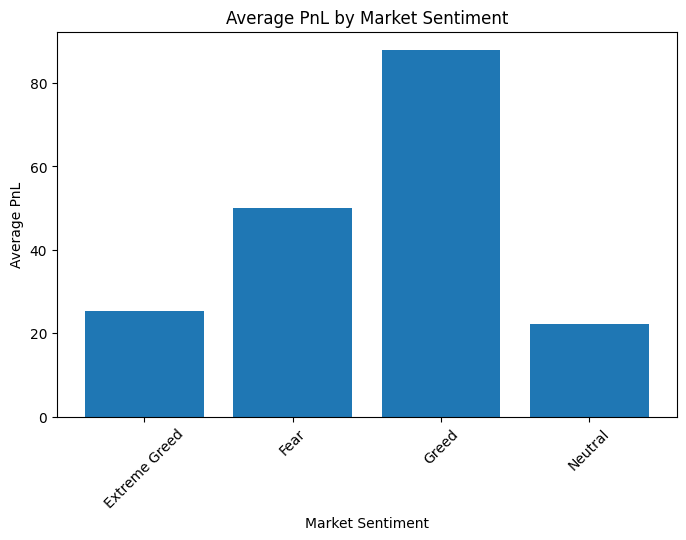

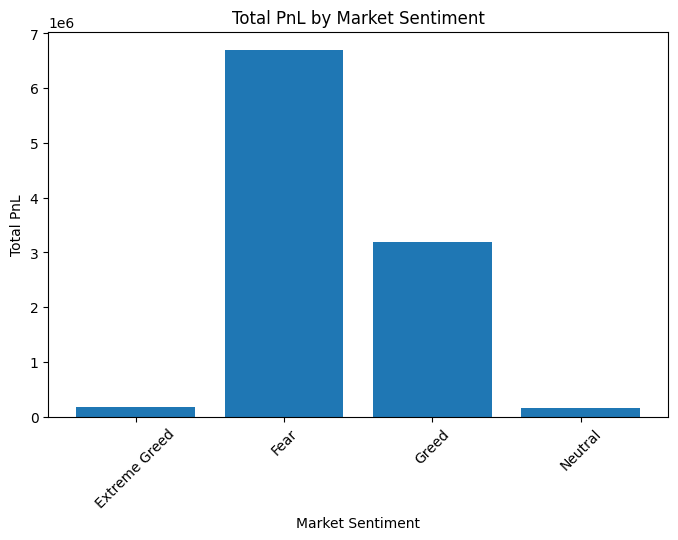

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for Average PnL
plt.figure(figsize=(8,5))
plt.bar(pnl_by_sentiment['Sentiment'], pnl_by_sentiment['Average_PnL'])
plt.title('Average PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average PnL')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Total PnL
plt.figure(figsize=(8,5))
plt.bar(pnl_by_sentiment['Sentiment'], pnl_by_sentiment['Total_PnL'])
plt.title('Total PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total PnL')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Average trade size per sentiment
avg_trade_size = merged_df.groupby('classification')['Size USD'].mean().reset_index()
avg_trade_size.columns = ['Sentiment', 'Average_Trade_Size_USD']
print(avg_trade_size)
#winr rate
win_rate = (
    merged_df.groupby('classification', group_keys=False)
    .apply(lambda g: pd.Series({
        'Win_Rate_%': (g['Closed PnL'] > 0).mean() * 100
    }), include_groups=False)
    .reset_index()
)




       Sentiment  Average_Trade_Size_USD
0  Extreme Greed             5660.265764
1           Fear             5259.977837
2          Greed             3182.883845
3        Neutral             3058.848110


In [ ]:
# Rename columns so they match
avg_trade_size.rename(columns={'classification': 'Sentiment'}, inplace=True)
win_rate.rename(columns={'classification': 'Sentiment'}, inplace=True)

# Merge all into one summary table
sentiment_summary = pnl_by_sentiment.merge(avg_trade_size, on='Sentiment').merge(win_rate, on='Sentiment')

# Display final table
sentiment_summary

,Sentiment,Number_of_Trades,Average_PnL,Total_PnL,Average_Trade_Size_USD,Win_Rate_%
0,Extreme Greed,6962,25.418772,1.769655e+05,5660.265764,49.008905
1,Fear,133871,50.047622,6.699925e+06,5259.977837,41.514592
2,Greed,36289,87.894859,3.189617e+06,3182.883845,44.647138
3,Neutral,7141,22.229713,1.587424e+05,3058.848110,31.718247


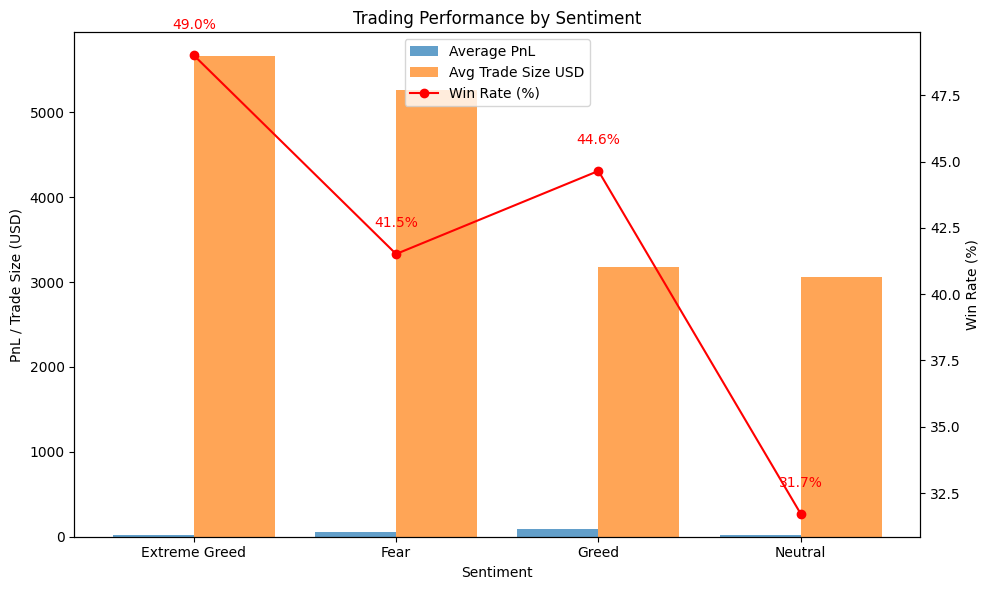

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named sentiment_summary
# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# X-axis positions
x = np.arange(len(sentiment_summary['Sentiment']))

# Bar chart for Average PnL
bar1 = ax1.bar(x - 0.2, sentiment_summary['Average_PnL'], width=0.4, label='Average PnL', alpha=0.7)

# Bar chart for Average Trade Size USD
bar2 = ax1.bar(x + 0.2, sentiment_summary['Average_Trade_Size_USD'], width=0.4, label='Avg Trade Size USD', alpha=0.7)

# Set labels for first axis
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('PnL / Trade Size (USD)')
ax1.set_xticks(x)
ax1.set_xticklabels(sentiment_summary['Sentiment'])
ax1.legend(loc='upper left')

# Create second y-axis for Win Rate %
ax2 = ax1.twinx()
line = ax2.plot(x, sentiment_summary['Win_Rate_%'], color='red', marker='o', label='Win Rate (%)')
ax2.set_ylabel('Win Rate (%)')

# Add title
plt.title('Trading Performance by Sentiment')

# Add Win Rate % labels
for i, rate in enumerate(sentiment_summary['Win_Rate_%']):
    ax2.text(i, rate + 1, f'{rate:.1f}%', ha='center', color='red')

# Combine legends
bars_labels = [bar1, bar2]
labels = [b.get_label() for b in bars_labels] + ['Win Rate (%)']
ax1.legend(bars_labels + line, labels, loc='upper center')

plt.tight_layout()
plt.show()


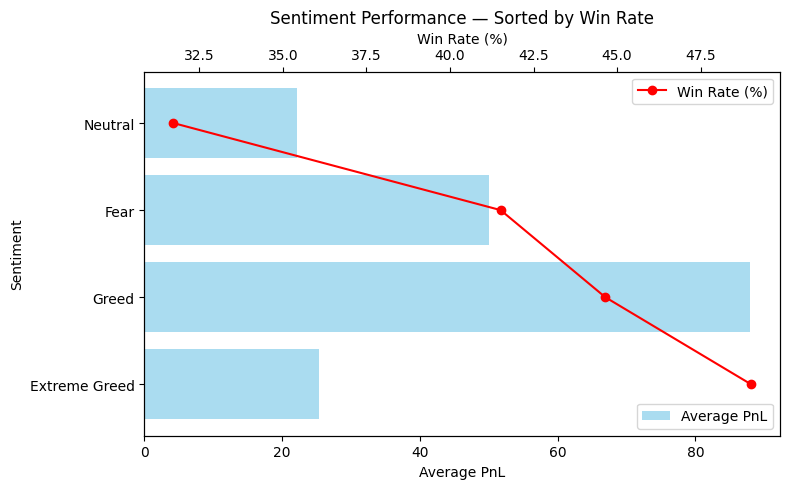

In [ ]:
# Sort by Win Rate (descending) — you can change to 'Average_PnL' if you prefer
sorted_df = sentiment_summary.sort_values(by='Win_Rate_%', ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot Average PnL
ax.barh(sorted_df['Sentiment'], sorted_df['Average_PnL'], color='skyblue', alpha=0.7, label='Average PnL')

# Overlay Win Rate
ax2 = ax.twiny()
ax2.plot(sorted_df['Win_Rate_%'], sorted_df['Sentiment'], 'ro-', label='Win Rate (%)')

# Labels
ax.set_xlabel('Average PnL')
ax2.set_xlabel('Win Rate (%)')
ax.set_ylabel('Sentiment')
ax.set_title('Sentiment Performance — Sorted by Win Rate')

# Legends
ax.legend(loc='lower right')
ax2.legend(loc='upper right')

# Show chart
plt.tight_layout()
plt.show()


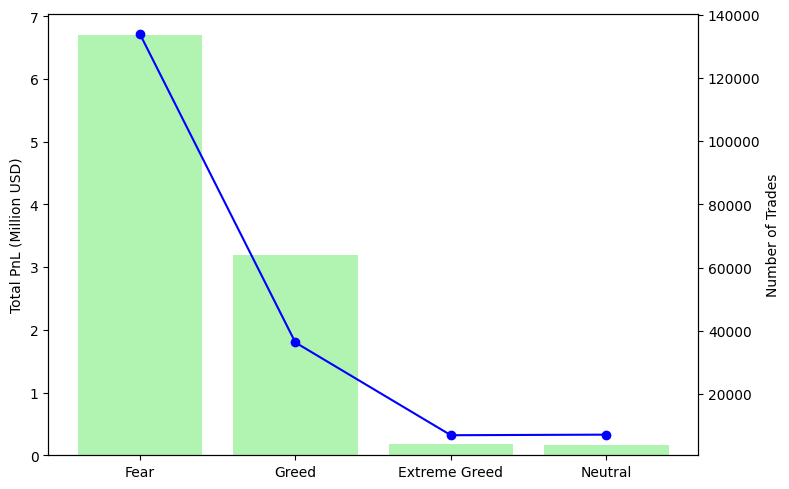

In [ ]:
sorted_df = sentiment_summary.sort_values(by='Total_PnL', ascending=False)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(sorted_df['Sentiment'], sorted_df['Total_PnL'] / 1e6, color='lightgreen', alpha=0.7)
ax.set_ylabel('Total PnL (Million USD)')

ax2 = ax.twinx()
ax2.plot(sorted_df['Sentiment'], sorted_df['Number_of_Trades'], 'bo-')
ax2.set_ylabel('Number of Trades')

plt.tight_layout()
plt.show()
